In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import pandas as pd
import pdb

from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
from pprint import pprint

import polyphase as phase

from skimage.transform import resize
from skimage.io import imread, imread_collection, imshow
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import re

In [33]:
images = imread_collection('../figures/hteplots/*.png')
tagger = re.compile('../figures/hteplots/(.*)_(.*)_(.*).png')

img0 = resize(images[0], (64,64))
img0_tags = tagger.findall(images.files[0])

img1 = resize(images[1], (64,64))
img1_tags = tagger.findall(images.files[1])

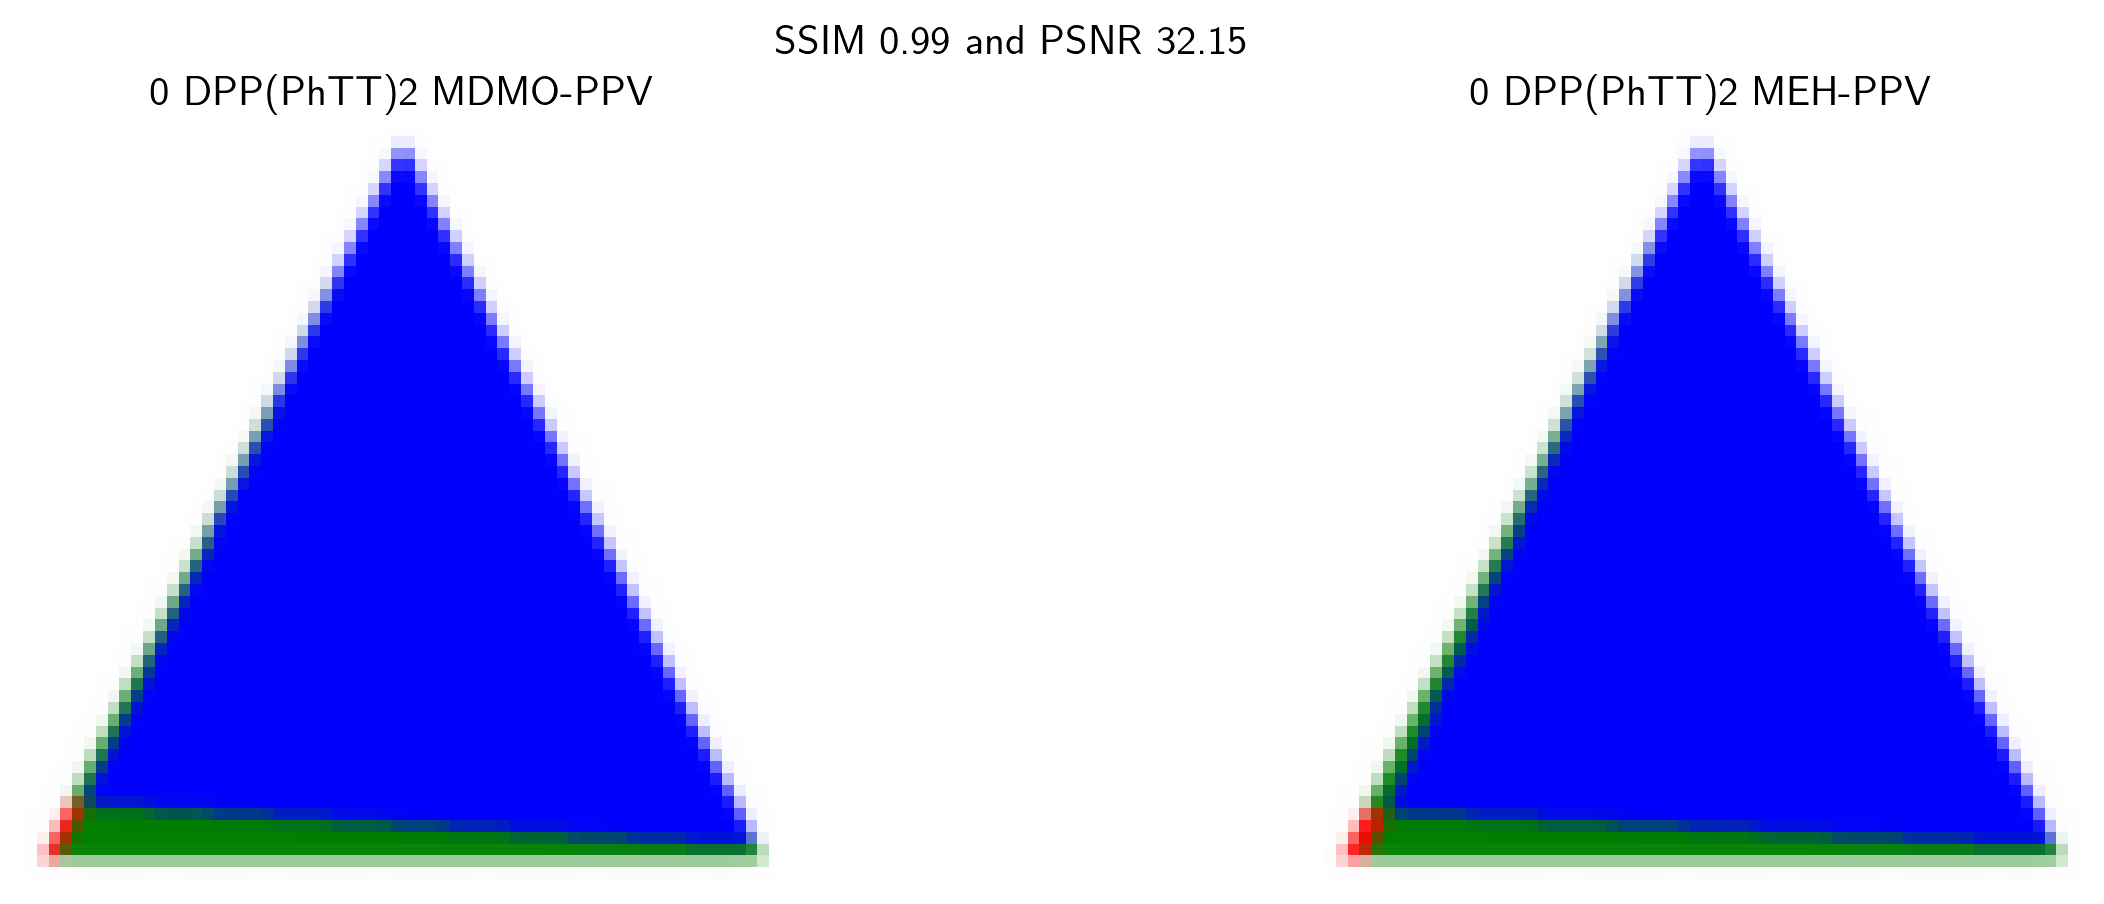

In [34]:
fig, ax = plt.subplots(1,2, figsize=(2*4*1.6, 4), dpi=250)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
ax[0].imshow(img0)
ax[0].set_title(list(map(" ".join, img0_tags))[0] )
ax[0].axis('off')
ax[1].imshow(img1)
ax[1].set_title(list(map(" ".join, img1_tags))[0] )
ax[1].axis('off')
SSIM = ssim(img0, img1, multichannel=True)
PSNR = psnr(img0, img1)
title = 'SSIM {:.2f} and PSNR {:.2f}'.format(SSIM, PSNR)
fig.suptitle(title)
plt.show()

In [12]:
from polyphase.parallel import get_distance_matrix

In [40]:
def get_ssim_distance(img0, img1):
    """ Given two images in img0, img1 compute distance"""
    
    img0 = resize(img0, (64,64))
    img1 = resize(img1, (64,64))
    d = ssim(img0, img1, multichannel=True)
    
    return d

images_dir = '../figures/hteplots/*.png'
images = imread_collection(images_dir)[:5]

print('Total of {} phase diagrams'.format(len(images)))

M = get_distance_matrix(images, get_ssim_distance) 

2020-08-22 23:11:30,998	ERROR worker.py:655 -- Calling ray.init() again after it has already been called.


Total of 5 phase diagrams
Processed : 3
(pid=3270) Computed 3 on 10.116.28.15
Processed : 2
(pid=3281) Computed 2 on 10.116.28.15
Processed : 1
(pid=3275) Computed 1 on 10.116.28.15
Processed : 0
Computation took : 00 Hr:00 min:22.01 sec
(pid=3262) Computed 0 on 10.116.28.15
